In [80]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio , structural_similarity
from skimage.filters import butterworth
from tqdm import tqdm

import sys 
sys.path.append('../utils')

from evaluation import fspectra

In [81]:
TEST_VOL_PATH = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/preprocessed/faciesmark/test_inline_vol.npy'
test_vol_clean = np.load(TEST_VOL_PATH)

In [82]:
# low pass filtering 
test_lpf = np.zeros_like(test_vol_clean)
nlines = test_lpf.shape[0]
ssim = []
psnr = []
spectra_clean = []
spectra_lpf = []
f = None
for i in tqdm(range(nlines)) : 
    test_lpf[i,:,:] = (butterworth(test_vol_clean[i,:,:].T, cutoff_frequency_ratio=0.10, high_pass=False, order=5.0, channel_axis=None)).T
    ssim.append(structural_similarity(test_vol_clean[i,:,:].T, test_lpf[i,:,:].T))
    psnr.append(peak_signal_noise_ratio(test_vol_clean[i,:,:].T, test_lpf[i,:,:].T))
    f,spectra_c = fspectra(test_vol_clean[i,:,:].T)
    f,spectra_l = fspectra(test_lpf[i,:,:].T)
    spectra_clean.append(spectra_c)
    spectra_lpf.append(spectra_l)
    

100%|██████████| 61/61 [00:01<00:00, 52.53it/s]


In [83]:
# spectra
len(spectra_clean[0])

451

In [84]:
np.mean(ssim), np.mean(psnr)
    

(0.563699590261471, 24.664854757539292)

In [85]:
spectra_clean_mean = np.mean(spectra_clean, axis=0)
spectra_lpf_mean = np.mean(spectra_lpf, axis=0)

In [86]:
spectra_clean_mean.shape , f.shape

((451,), (451,))

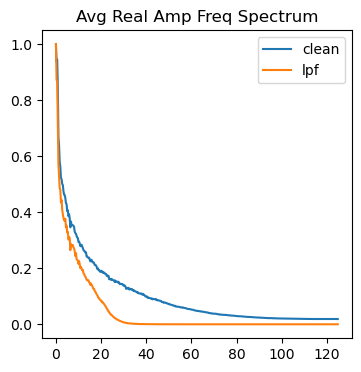

In [87]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(4,4))
plt.title("Avg Real Amp Freq Spectrum")
plt.plot(f,spectra_clean_mean.T/max(spectra_clean_mean),label='clean') # normalised values
plt.plot(f,spectra_lpf_mean.T/max(spectra_lpf_mean),label='lpf') # normalised values

plt.legend()
plt.show() 